# 1. Введение

## Вспомним как выглядит цикл решения мл-задачи

![crisp-dm](./images/crisp-dm.png)

### Предсказание оттока клиентов

Чтобы потренироваться решать задачу **оттока**, сначала поймем зачем может понадобиться такая задача.

Представим, что у нас есть банк, и клиенты хранят у нас свои деньги, понятно, что мы можем использовать их средства для операций компании. И чем больше у нас запасы, тем больший потенциал у нас есть. Хорошо, получается, нам важен каждый клиент.

Предположим, что всего у нас 100 000 клиентов и каждый хранит на своем счете **1 миллион рублей**. Получается у нас есть **10 миллиардов**. \
**Ого! И это только средств, а сколько мы можем заработать на каждом миллионе!**


![churn2](./images/churn2.png)

А что, если вдруг 10% клиентов от нас уйдет?

**Мы потеряем миллиард рублей средств, да еще и нашу прибыль сократим. \
Нужно стараться удержать наших клиентов, каждый очень ценен!**

Хорошо, мы поняли нашу задачу - это бинарная классификация на два класса **уйдет** клиент из банка или **не уйдет**.
Будем предсказывать вероятность того, что клиент оттечет, то есть число в диапазоне от 0 до 1.


Бизнес выгода ясна, также представим, что данные мы тоже придумали откуда достать.

Теперь нам нужно понять **как же уменьшить наши потери** в миллион до какого-то небольшого числа?

![churn4](./images/churn4.png)

### Составим план действий:

#### 1) Подготовка данных
    * Выборка данных
    * Разведочный анализ данных
    * Очистка данных на основе анализа
    * Генерация вспомогательных данных
    
#### 2) Моделирование
    * Выбор алгоритма	
    * Выбор мета-метрики	
    * План тестирования алгоритма
    * Обучение моделей
    * Оценка качества модели

# 2. Подготовка данных


![churn5](./images/churn5.png)

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Построение бейзлайна

Выборка данных у нас уже есть - мы будем использовать данные с сайта kaggle для такой же задачи. \
**Ссылка на соревнование:** https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

**Разведочный анализ данных:**
В рамках разведочного анализа данных, его также называют **EDA(Exploratory Data Analysis)**, мы стремимся определить и визуализировать, какие факторы способствуют оттоку клиентов.

In [1]:
#Наши стандартные библиотеки
import numpy as np
import pandas as pd

# Для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


In [4]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4801,15679810,Chapman,690,France,Male,39,6,0.00,2,1,0,160532.88
1,2102,15778934,Napolitani,678,Spain,Female,49,8,0.00,2,0,1,98090.69
2,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,0,199320.77
3,1127,15593973,Wilkie,663,Spain,Female,33,8,122528.18,1,1,0,196260.30
4,383,15568240,Ting,492,Germany,Female,30,10,77168.87,2,0,1,146700.22


![churn8](./images/churn10.png)

In [5]:
from teacher_bot.churn_prediction import ChurnPrediction

Это Бот ProductStar он будет проверять твои задания

In [6]:
BotProductStar = ChurnPrediction()

Привет! Приятно познакомиться!


In [7]:
BotProductStar.test_task(df = train)

Думаю...
Ого! Датасет, сейчас мы будем его исследовать, интересно, что в нем.
Сам я не справляюсь - нужна твоя помощь


### Задание 1. Бот тебе его расскажет - запусти ячейку ниже.

In [10]:
dataset = train.drop(columns= ["RowNumber", 'IsActiveMember', 'HasCrCard', 'Gender', 'Geography', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'Tenure', "CustomerId", "Surname", 'Balance', 'Age'])
dataset.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [11]:
BotProductStar.drop_task(dataset)

Думаю...
Ой-ой. Я тебя не понимаю, мне нужен pd.DataFrame без колонок, в которых слишком много уникальных значений


![churn8](./images/churn11.png)

### Задание 2. Бот тебе его расскажет - запусти ячейку ниже.

In [13]:
 BotProductStar.null_task(answer='нет')

Думаю...
Ура! Второе задание позади!
Следующая кодовая фраза Science


In [ ]:
# BotProductStar.null_task(answer=) - раскомментируй меня и отправь ответ в этой переменной либо 'да' либо 'нет'

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [x] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных

In [14]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


Данные выглядят, как снимок на определенный момент времени 
Возможно баланс на заданную дату, что **оставляет много вопросов:**
    * Какая это дата и какое значение она имеет?
    * Можно ли получить баланс за определенный период времени, а не за одну дату.
    * Есть клиенты, которые вышли, но все еще имеют остаток на счете! Что бы это значило? Могли они выйти из продукта, а не из банка?
    * Что значит быть активным участником и есть ли в этом разные степени? Может быть, лучше вместо этого предоставить счет транзакций, как по кредитам, так и по дебету счета?
Разбивка на продукты, купленные клиентом, может предоставить дополнительную информацию, которая увеличит список продуктов.


![churn8](./images/churn14.png)

Здесь мы приступаем к моделированию без контекста, хотя обычно наличие контекста и лучшее понимание процесса извлечения данных дает более качественные модели.

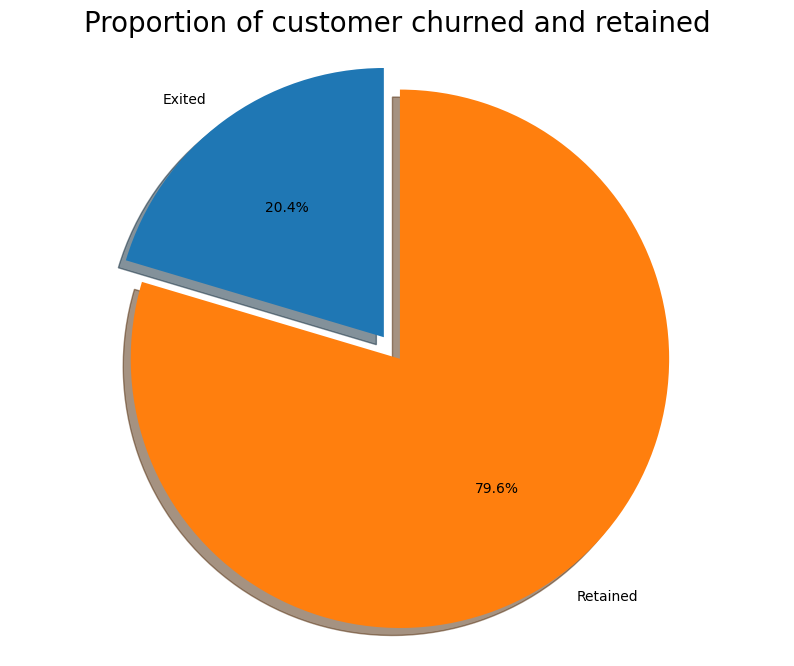

In [15]:
labels = 'Exited', 'Retained'
sizes = [train.Exited[train['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Таким образом, около 20% клиентов ушли. Базовая модель может предполагать, что 20% клиентов уйдут.
Учитывая, что 20% - это небольшое число, нам необходимо убедиться, что выбранная модель действительно предсказывает с большой точностью эти 20%, поскольку для банка интересно идентифицировать и сохранить клиентов.

##### Анализ категориальных переменных

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = train, ax=axarr[1][1])

<Axes: xlabel='IsActiveMember', ylabel='count'>

**Отметим следующее:**

* Большинство данных от лиц из Франции. Возможно, у банка недостаточно ресурсов для обслуживания клиентов в тех областях, где у него меньше клиентов.
* Доля сменяющих клиентов женщин также выше, чем доля клиентов-мужчин.
* Интересно, что большинство клиентов, которые ушли, - это клиенты с кредитными картами. Учитывая, что у большинства клиентов есть кредитные карты, это может оказаться простым совпадением.
* Неудивительно, что у неактивных участников больше отток. 
* Общая доля неактивных клиентов довольно высока, можно предположить, что банку потребуется программа, направленная на превращение этой группы в активных клиентов.

##### Анализ количественных переменных

In [17]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = train, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

**Отметим следующее:**
* Нет существенной разницы в распределении кредитного рейтинга между оставшимися и оттекшими клиентами.
* Старшие клиенты оттекают чаще, чем более молодые, это намекает на разницу в предпочтениях обслуживания в возрастных категориях. Банку может потребоваться пересмотреть свой целевой рынок или пересмотреть стратегию удержания клиентов между разными возрастными группами.
* Что касается срока владения, то клиенты, находящиеся на крайнем конце (мало времени проводившие с банком или много времени в банке), с большей вероятностью уйдут, чем те, которые имеют средний срок.
* Банк теряет клиентов со значительными остатками на банковских счетах, что может снизить их доступный капитал для кредитования.
* Ни продукт, ни зарплата не оказывают существенного влияния на вероятность оттока.

В целом к разведочному анализу данных можно также отнести **построение базового решения**. Важно делать на самом первом этапе, чтобы на пальцах прикидывать, а сколько можно сэкономить денег.

**Например:**
Скажем, чтобы привлечь клиента мы тратим 100 000р, а зарабатываем в год на каждом 200 000р.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
#возьмем случайную подвыборку из train и оценим на ней сколько мы экономим
val_sample = train.sample(frac=0.2, random_state=42).reset_index(drop=True)

In [20]:
val_sample.Exited.value_counts()

Exited
0    1145
1     295
Name: count, dtype: int64

Всего видим, что ушло 295 клиентов. 
Получается мы потеряли 295 000 000р!

Есть ли что-то, что мы могли с этим сделать?

Давайте посчитаем экономию, при предскзаании алгоритмом, который случайно возвращает 0 или 1, то есть с вероятностью 0.5 говорит, что клиент оттечет и с такой же вероятностью, что клиент не оттечет.

Отсюда поймём, а имееют ли смысл вообще акции по привлечению клиентов.

In [21]:
np.random.seed(42)
rand_prediction = np.random.randint(2, size=len(val_sample))

In [22]:
tn, fp, fn, tp = confusion_matrix(val_sample.Exited, rand_prediction).ravel()

In [23]:
print(f'Удержали уходящих: {tp}')
print(f'Удерживали, но они и не собирались уходить: {fp}')
print(f'Не стали удерживать и они ушли: {fn}')
print(f'Правильно не стали удерживать: {tn}')

Удержали уходящих: 145
Удерживали, но они и не собирались уходить: 575
Не стали удерживать и они ушли: 150
Правильно не стали удерживать: 570


Посчитаем сколько мы потратили всего на привлечение:
(145 + 575) * 100 000 =  72 000 000

А сколько потеряли на тех, кто ушел:
150 000 000

Количество денег ушедших из банка **ничего не делали: 295 000 000**\
Количество денег ушедших из банка **простейшей модели: 150 000 000**

**Удержано денег в банке: 145 000 000**\
**При расходах: 72 000 000**

Ого и это мы даже машинное обучение еще не начали использовать! И взяли только 20% от всей выборки.

На этом наш разведочный анализ можно закончить - мы узнали все, что нас интересует.

   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

# Домашнее задание

##### С помощью этого метода можно делать посылки боту с предскзаниями, а он будет возвращать результат.

In [24]:
BotProductStar.production_quality()

Я умею оценивать качество на тесте. Метрика, которую я измеряю ROC-AUC.Тут можно отправлять сделанные предсказания. Чтобы я не запутался куда какие предсказания, давай будем присылать в виде датафрейма у которого первая колонка 'RowNumber', а вторая 'predict'. Пример посылки попробуем, когда отправим submission.


Это тестовый пример посылки, вам нужно будет точно также предсказывать вероятность для каждого наблюдения и делать посылки, отправляя их боту.

In [25]:
test = pd.read_csv('./data/test.csv')

In [113]:
submission = test[['RowNumber']].copy()
baseline = predictions_proba_xgb
submission['predict'] = baseline

In [114]:
submission.head()

,RowNumber,predict
0,4801,0.102937
1,2102,0.281238
2,4487,0.198751
3,1127,0.121097
4,383,0.047119


In [115]:
BotProductStar.production_quality(answer=submission)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8610278969764033
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


Следующая часть урока полностью ложится на ваши плечи:
* Нужно правильно сгенерировать вспомогательные признаки, но сильно можно не увлекаться.
* Правильно их обработать для подачи в модель.
* И построить модель, которая будет давать достаточное качество.

Для защиты проекта необходимо будет построить модель, качество которой дает ROC-AUC не ниже 0.8. Оцениваться модель будет с помощью бота, а точнее функции - `BotProductStar.production_quality(answer=submission)`



submission - это датафрем, в котором в первой колонке указан RowNumber из файла test, а в колонке predict предсказанная вероятность ухода клиента.

Здесь можно продолжить построение модели. Давайте вспомним, какие пункты осталось сделать.

### Подготовка данных
   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

####  Моделирование
   - [ ]  Выбор алгоритмов	
   - [ ]  Выбор мета-метрики	
   - [ ]  План тестирования алгоритма
   - [ ]  Обучение моделей
   - [ ]  Оценка качества модели

In [88]:
train_df = train

In [90]:
test_df = test

In [91]:
all_data = pd.concat([train_df.drop('Exited', axis=1), test_df], ignore_index=True)

In [92]:
features_to_drop = ['RowNumber', 'CustomerId', 'Surname']
all_data_processed = all_data.drop(columns=features_to_drop)

In [93]:
categorical_cols = ['Geography', 'Gender']
all_data_processed = pd.get_dummies(all_data_processed, columns=categorical_cols, drop_first=True)

In [94]:
X_train_processed = all_data_processed.iloc[:len(train_df)]
X_test_processed = all_data_processed.iloc[len(train_df):]

# Целевая переменная для тренировки
y_train = train_df['Exited']

print("\nРазмер X_train_processed после препроцессинга:", X_train_processed.shape)
print("Размер X_test_processed после препроцессинга:", X_test_processed.shape)
print("Примеры столбцов X_train_processed:", X_train_processed.columns.tolist())


Размер X_train_processed после препроцессинга: (7200, 11)
Размер X_test_processed после препроцессинга: (800, 11)
Примеры столбцов X_train_processed: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1) # n_jobs=-1 использует все доступные ядра процессора

# Обучаем модель
print("\nОбучение модели Случайного Леса...")
model.fit(X_train_processed, y_train)
print("Модель обучена.")

# --- 4. Предсказание на тестовом наборе ---
print("Выполнение предсказаний на тестовом наборе...")
predictions = model.predict(X_test_processed)
print("Предсказания выполнены.")


Обучение модели Случайного Леса...
Модель обучена.
Выполнение предсказаний на тестовом наборе...
Предсказания выполнены.


In [101]:
import xgboost as xgb

In [106]:
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_val = neg_count / pos_count
print(f"\nРекомендуемое значение scale_pos_weight для XGBoost: {scale_pos_weight_val:.2f}")

    
model_xgb = xgb.XGBClassifier(objective='binary:logistic', # Для бинарной классификации
                                  n_estimators=300,
                                  learning_rate=0.05,
                                  max_depth=5,
                                  subsample=0.7,
                                  colsample_bytree=0.7,
                                  gamma=0.1,
                                  random_state=42,
                                  n_jobs=-1,
                                  scale_pos_weight=scale_pos_weight_val, # Борьба с дисбалансом
                                  use_label_encoder=False, # Убрать предупреждение
                                  eval_metric='logloss' # Метрика для оценки в процессе обучения
                                 )

print("\nОбучение модели XGBoost...")
model_xgb.fit(X_train_processed, y_train)
print("Модель XGBoost обучена.")


Рекомендуемое значение scale_pos_weight для XGBoost: 3.90

Обучение модели XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Модель XGBoost обучена.


In [107]:
# --- 4. Предсказание на тестовом наборе с XGBoost ---
print("Выполнение предсказаний на тестовом наборе с XGBoost...")
predictions_xgb = model_xgb.predict(X_test_processed)
predictions_proba_xgb = model_xgb.predict_proba(X_test_processed)[:, 1]

Выполнение предсказаний на тестовом наборе с XGBoost...


In [109]:
# --- 5. Оценка качества на тренировочных данных с XGBoost (для проверки) ---
train_predictions_xgb = model_xgb.predict(X_train_processed)
train_accuracy_xgb = accuracy_score(y_train, train_predictions_xgb)
train_roc_auc_xgb = roc_auc_score(y_train, model_xgb.predict_proba(X_train_processed)[:,1])
print(f"\nТочность модели XGBoost на тренировочных данных: {train_accuracy_xgb:.4f}")
print(f"ROC AUC модели XGBoost на тренировочных данных: {train_roc_auc_xgb:.4f}")

NameError: name 'roc_auc_score' is not defined